In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#importing modules
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor



In [3]:
#reading data from drive 
df = pd.read_csv('/content/drive/MyDrive/spotify popularity /SpotifyFeatures.csv')

In [4]:
#Inspecting the current dataframe
df.head()


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


**Exploratory Data Analysis**

In [5]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


Comedy              9681
Soundtrack          9646
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Children’s Music    9353
Folk                9299
Hip-Hop             9295
Rock                9272
Alternative         9263
Classical           9256
Rap                 9232
World               9096
Soul                9089
Blues               9023
R&B                 8992
Anime               8936
Reggaeton           8927
Ska                 8874
Reggae              8771
Dance               8701
Country             8664
Opera               8280
Movie               7806
Children's Music    5403
A Capella            119
Name: genre, dtype: int64


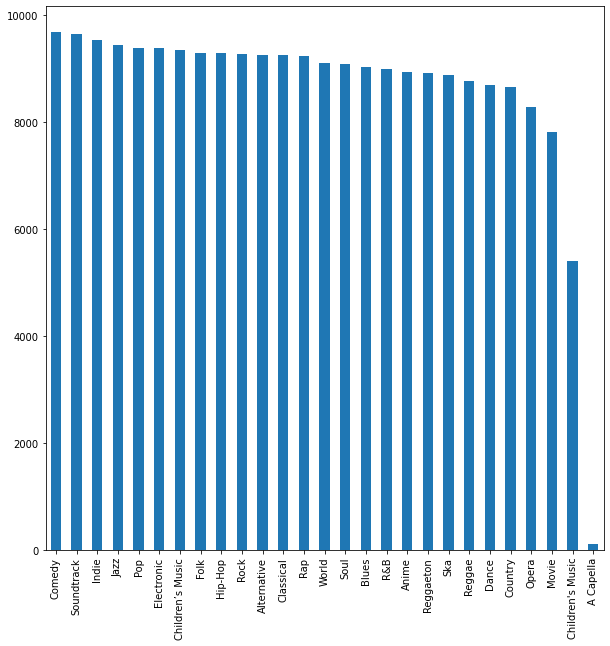

In [6]:
# Distrubution for music genres
print(df['genre'].value_counts())
df['genre'].value_counts().plot(kind='bar',figsize=(10,10))

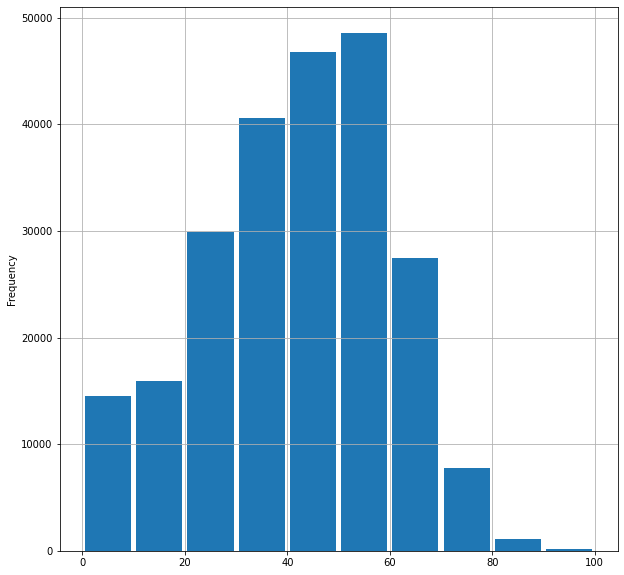

In [7]:
#Popularity 

df['popularity'].plot.hist(grid=True,bins=10,rwidth=0.9,figsize=(10,10))

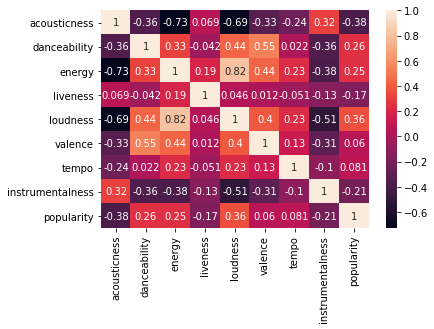

In [8]:
#Exploring the relationships between features

sns.heatmap(df.loc[:,['acousticness', 'danceability', 'energy', 'liveness', 'loudness', 'valence','tempo','instrumentalness','popularity']].corr(),annot=True)

In [9]:
# feature array and target vector 

X = df.loc[:,['acousticness', 'danceability', 'energy', 'liveness', 'loudness', 'valence','tempo','instrumentalness']]
y = np.array(df['popularity']).reshape(-1,1)

# feature scaling 
'''
from sklearn.preprocessing import StandardScaler
sc_X= StandardScaler()
sc_y= StandardScaler()
X=sc_X.fit_transform(X)
y=sc_y.fit_transform(y)
'''



# splitting the data


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)

# creating models and fitting 
lr = LinearRegression()
lr.fit(X_train,y_train)

dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

rf = RandomForestRegressor(max_depth=2, random_state=0)
rf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [10]:
# making predictions

predictions_lr = lr.predict(X_test)
predictions_dt = dt.predict(X_test)
predictions_rf = rf.predict(X_test)


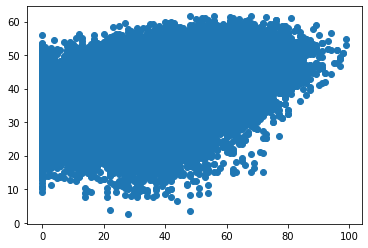

In [11]:
# scatter plot of true y and predicted y

plt.scatter(y_test,predictions_lr)

Residuals appear to be normally distributed

(array([  252.,  1662.,  4741., 10142., 16217., 20229., 12214.,  3784.,
          533.,    44.]),
 array([-55.99744387, -44.72070508, -33.44396629, -22.16722751,
        -10.89048872,   0.38625007,  11.66298886,  22.93972764,
         34.21646643,  45.49320522,  56.76994401]),
 <a list of 10 Patch objects>)

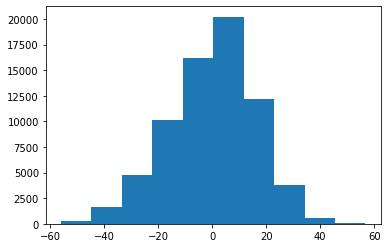

In [12]:
# histogram of residuals

plt.hist(y_test-predictions_lr)

In [13]:
# Evaluating regression model with MAE, MSE and RMSE

print('REGRESSION')
print()
MAE = metrics.mean_absolute_error(y_test, predictions_lr)
print('Mean Absolute Error: ',MAE)

MSE = metrics.mean_squared_error(y_test,predictions_lr)
print('Mean Squared Error: ',MSE)

RMSE = np.sqrt(MSE)
print('Root Mean Squared Error: ',RMSE)

R2 = metrics.r2_score(y_test,predictions_lr)
print('R2 score: ',R2)
print()

print('DECISION TREE')
print()
MAE = metrics.mean_absolute_error(y_test, predictions_dt)
print('Mean Absolute Error: ',MAE)

MSE = metrics.mean_squared_error(y_test,predictions_dt)
print('Mean Squared Error: ',MSE)

RMSE = np.sqrt(MSE)
print('Root Mean Squared Error: ',RMSE)

R2 = metrics.r2_score(y_test,predictions_dt)
print('R2 score: ',R2)
print()

print('RANDOM FOREST')
print()
MAE = metrics.mean_absolute_error(y_test, predictions_rf)
print('Mean Absolute Error: ',MAE)

MSE = metrics.mean_squared_error(y_test,predictions_rf)
print('Mean Squared Error: ',MSE)

RMSE = np.sqrt(MSE)
print('Root Mean Squared Error: ',RMSE)

R2 = metrics.r2_score(y_test,predictions_rf)
print('R2 score: ',R2)
print()

REGRESSION

Mean Absolute Error:  12.742222165406773
Mean Squared Error:  254.2653344037457
Root Mean Squared Error:  15.945699558305547
R2 score:  0.23273329631028417

DECISION TREE

Mean Absolute Error:  11.264341437397098
Mean Squared Error:  297.13450125135853
Root Mean Squared Error:  17.237589775005045
R2 score:  0.10337203511349324

RANDOM FOREST

Mean Absolute Error:  13.122538900166843
Mean Squared Error:  267.43402965058334
Root Mean Squared Error:  16.35341033700871
R2 score:  0.19299566783006183



Second model this time with feature selection, based on using features with high corr with target feature

In [14]:
X = df.loc[:,['danceability', 'energy', 'loudness']]
y = df['popularity']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)

model2 = LinearRegression()

model2.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
# making predictions

predictions2 = model2.predict(X_test)

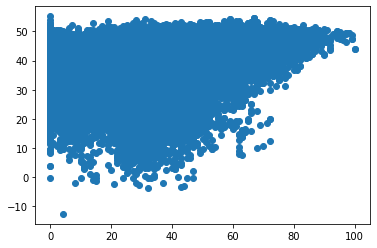

In [16]:
# scatter plot of true y and predicted y

plt.scatter(y_test,predictions2)

(array([  565.,  2320.,  5547., 10971., 15633., 19901., 11636.,  2896.,
          322.,    27.]),
 array([-55.20335915, -43.71585555, -32.22835196, -20.74084837,
         -9.25334477,   2.23415882,  13.72166241,  25.20916601,
         36.6966696 ,  48.18417319,  59.67167678]),
 <a list of 10 Patch objects>)

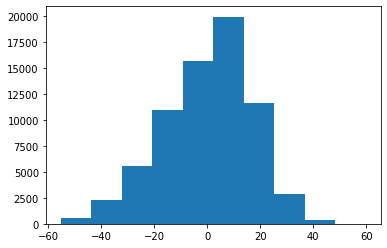

In [17]:
# histogram of residuals

plt.hist(y_test-predictions2)

In [18]:
MAE = metrics.mean_absolute_error(y_test, predictions2)
print('Mean Absolute Error: ',MAE)

MSE = metrics.mean_squared_error(y_test,predictions2)
print('Mean Squared Error: ',MSE)

RMSE = np.sqrt(MSE)
print('Root Mean Squared Error: ',RMSE)

Mean Absolute Error:  13.504921935749719
Mean Squared Error:  281.4160159264782
Root Mean Squared Error:  16.77545873967321
